# Machine Learning Project

# I. Introduction

Sequence classification is a type of predictive problem where we try to predict the category of a sequence of inputs over space or time. It is a hard task because the inputs can vary in length, the set of words (vocabulary) can be vary large and the model may want to understand the long-term context of a sequence.

## Description of the dataset

We will demonstrate sequence learning through a twitter sentiment analysis classification problem. Each tweet are short messages of varied length of words and the task is to build a classifier that can correctly predict the sentiment of each tweet.
Our dataset contains more than 1.2 million tweets, equally split in positive and negative messages. 

## Approach

We will approach this classification task by first getting an overlook of the dataset and the kind of messages we have at hand. Then we will apply some NLP techniques to transform our data into numerical objects (embedding) which we will feed into various Machine Learning Models. From Logistic Regressions to Deep Learning models, we will compare them and create a benchmark of various Supervised models for this classification task.

## Import

### Libraries and modules

In [7]:
import numpy as np
import pandas as pd
from Functions import GridSearch_, make_results

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.3)
sns.set(style="darkgrid")

# Machine Learning
## Tools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
## Models
from sklearn.linear_model import LogisticRegression

### Dataset

In [2]:
emote = pd.read_csv("data/MLUnige2021_train.csv",usecols=['emotion', 'user', 'text'])
emote_50 = emote[:50000]   #  50.000 first obs
emote_100 = emote[:100000] # 100.000 first obs
emote_320 = emote[:320000] #  about 1/4 of obs

results = pd.DataFrame()

# Logistic Regression

## Logistic Classification

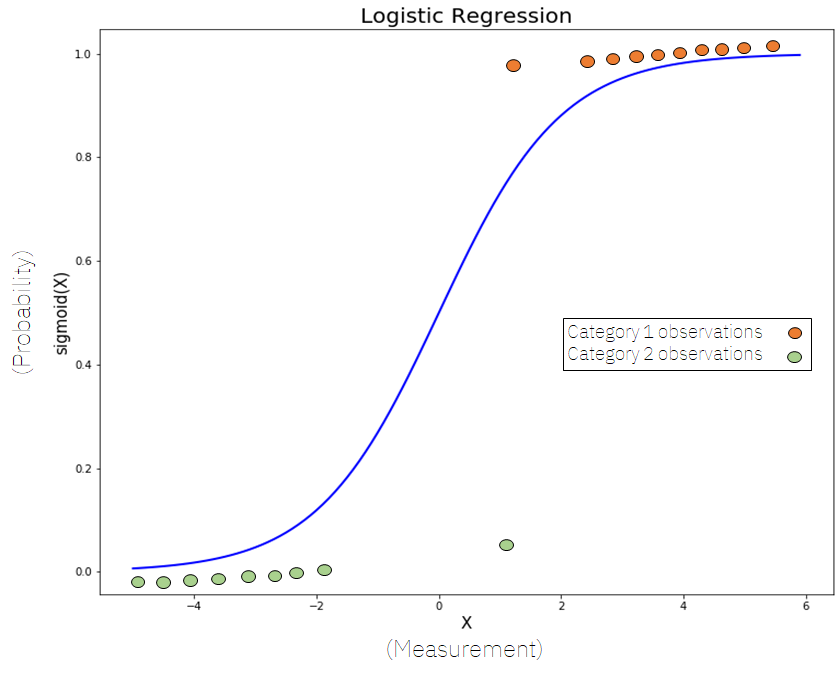


Logistic regression is a statistical method used for binary classification. It is a type of regression analysis that is well-suited for predicting the probability of an outcome that can take on two possible values, typically 0 and 1. The outcome variable in logistic regression is often referred to as the dependent variable, and it represents the categorical response or class that we want to predict.

The logistic regression model uses the logistic function (also known as the sigmoid function) to transform a linear combination of input features into a value between 0 and 1. The logistic function is defined as:


Here: P(Y=1)= 1 / (1+e−(b0+b1x1+b2x2+…+bnxn))

- P(Y=1) is the probability of the dependent variable (Y) being equal to 1.
- e is the base of the natural logarithm.
- b0, b1, b2, …, bn are the coefficients of the model.
- x1, x2, …, xn are the input features.

The logistic regression model estimates the coefficients b0, b1, b2, …, bn based on the training data. Once the model is trained, it can be used to predict the probability of the binary outcome for new, unseen data.

It is a model commonly used in classification task and so it will be the first I apply.

Performing grid search...

Data length:  40000
Pipeline: CountVectorizer() TfidfTransformer() LogisticRegression()

Parameters:
{'model__C': (0.9,),
 'model__penalty': ('l2',),
 'model__solver': ('lbfgs', 'liblinear'),
 'vect__ngram_range': ((1, 2), (1, 3))}

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Duration: 78.5s (n_jobs: 2)

Best score: 0.770
Best parameters set:
	model__C: 0.9
	model__penalty: 'l2'
	model__solver: 'liblinear'
	vect__ngram_range: (1, 2)


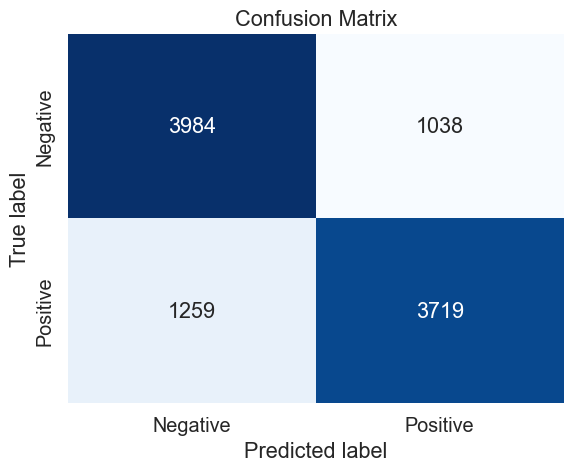

In [67]:
# Define the train and test sets (50 000 observations)
data = emote_50
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)

# Define the parameters to tune
parameters_log = {
    # 'vect__max_df': (0.5,),
    'vect__ngram_range': ((1, 2), (1, 3)),
    'model__C': (.9,),
    'model__penalty': ('l2',),
    'model__solver': ('lbfgs', 'liblinear'),
}

# Perform the grid search
gs = GridSearch_(X_train, 
                 y_train, 
                 n_jobs=2,
                 parameters = parameters_log,
                 model = LogisticRegression())

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

log_50_cv_results = make_results('log', '50', gs, 'accuracy')
results = pd.concat([results, log_50_cv_results], axis=0)

Performing grid search...

Data length:  80000
Pipeline: CountVectorizer() TfidfTransformer() LogisticRegression(max_iter=500)

Parameters:
{'model__C': (0.9, 1.0),
 'model__penalty': ('l2',),
 'model__solver': ('newton-cg', 'lbfgs', 'liblinear'),
 'vect__ngram_range': ((1, 2), (1, 3))}

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Duration: 458.7s (n_jobs: 2)

Best score: 0.785
Best parameters set:
	model__C: 1.0
	model__penalty: 'l2'
	model__solver: 'liblinear'
	vect__ngram_range: (1, 2)


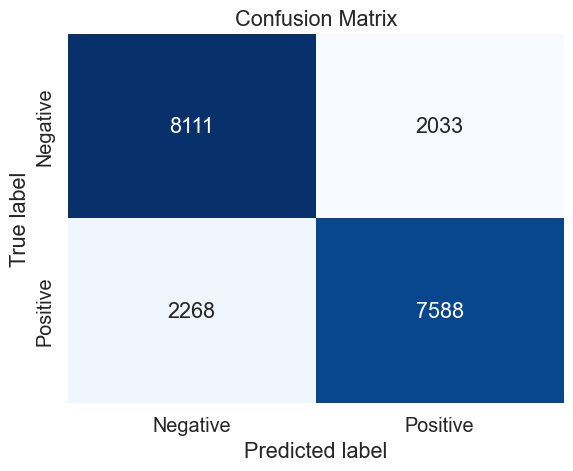

In [68]:
# Define the train and test sets (100 000 observations)
data = emote_100
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user),
                                                    data.emotion,
                                                    test_size=0.2,
                                                    random_state=37)

# Define the parameters to tune
parameters_log = {
    # 'vect__max_df': (0.5,),
    'vect__ngram_range': ((1, 2), (1, 3)),
    'model__C': (.9, 1.0),
    'model__penalty': ('l2', ),
    'model__solver': ('newton-cg', 'lbfgs', 'liblinear'),
}

# Perform the grid search
gs = GridSearch_(X_train,
                 y_train,
                 n_jobs=2,
                 parameters=parameters_log,
                 model=LogisticRegression(max_iter=500))

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(
    mat,
    fmt='d',
    cbar=False,
    annot=True,
    #square=True,
    cmap=plt.cm.Blues,
    xticklabels=('Negative', 'Positive'),
    yticklabels=('Negative', 'Positive'))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

log_100_cv_results = make_results('log', '100', gs, 'accuracy')
results = pd.concat([results, log_100_cv_results], axis=0)

Performing grid search...

Data length:  256000
Pipeline: CountVectorizer() TfidfTransformer() LogisticRegression(max_iter=500)

Parameters:
{'model__C': (0.9, 1.0),
 'model__penalty': ('l2',),
 'model__solver': ('lbfgs',),
 'vect__max_df': (0.05, 0.1, 0.15),
 'vect__ngram_range': ((1, 2),)}

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Duration: 848.9s (n_jobs: -1)

Best score: 0.803
Best parameters set:
	model__C: 1.0
	model__penalty: 'l2'
	model__solver: 'lbfgs'
	vect__max_df: 0.1
	vect__ngram_range: (1, 2)


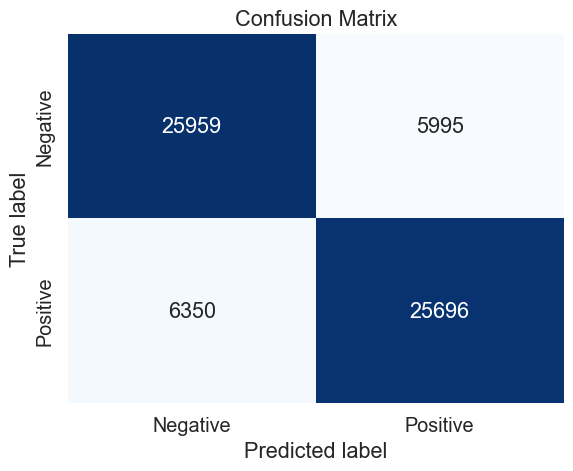

In [69]:
# Define the train and test sets (320 000 observations)
data = emote_320
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)

# Define the parameters to tune
parameters_log = {
    'vect__max_df': (.05,.1,0.15,),
    'vect__ngram_range': ((1, 2),),
    'model__C': (.9, 1.0),
    'model__penalty': ('l2',),
    'model__solver': ('lbfgs',),
}

# Perform the grid search
gs = GridSearch_(X_train, y_train, parameters = parameters_log, model = LogisticRegression(max_iter=500))

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

log_320_cv_results = make_results('log', '320', gs, 'accuracy')
results = pd.concat([results, log_320_cv_results], axis=0)

Performing grid search...

Data length:  1023144
Pipeline: CountVectorizer() TfidfTransformer() LogisticRegression(max_iter=500)

Parameters:
{'model__C': (1.0,),
 'model__penalty': ('l2',),
 'model__solver': ('lbfgs',),
 'vect__max_df': (0.1,),
 'vect__ngram_range': ((1, 2),)}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Duration: 1132.8s (n_jobs: -1)

Best score: 0.821
Best parameters set:
	model__C: 1.0
	model__penalty: 'l2'
	model__solver: 'lbfgs'
	vect__max_df: 0.1
	vect__ngram_range: (1, 2)


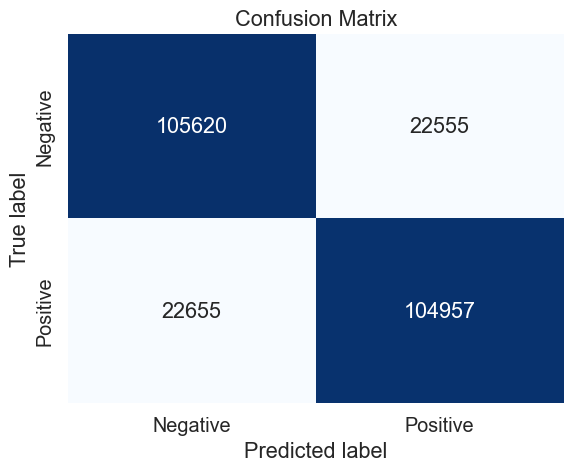

In [70]:
######################################### Final hypertuned model #########################################

# Define the train and test sets (all observations)
data = emote
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=42)

# Define the parameters to tune
best_parameters_log = {
    'vect__max_df': (.1,),
    'vect__ngram_range': ((1, 2),),
    'model__C': (1.0,),
    'model__penalty': ('l2',),
    'model__solver': ('lbfgs',)
}

# Perform the grid search
#gs = GridSearch_(X_train, y_train, parameters = best_parameters_log, model = LogisticRegression())
gs = GridSearch_(X_train, y_train, parameters = best_parameters_log, model = LogisticRegression(max_iter=500))

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

log_cv_results = make_results('log', 'all', gs, 'accuracy')
results = pd.concat([results, log_cv_results], axis=0)

In [11]:
results.to_csv('Models Results/log_res.csv')

# IV. Results

Here is a benchmark of all the models accuracy performance:

In [9]:
data = {'model': ['log', 'log', 'log', 'log', 'mnb', 'mnb', 'mnb', 'mnb', 'svm', 'svm', 'svm', 'svm'], 
        'size': ['50', '100', '320', 'all', '50', '100', '320', 'all', '50', '100', '320', 'all'], 
        'accuracy':[0.770, 0.785, 0.803, 0.821, 0.763, 0.778, 0.792, 0.810, 0.780, 0.794, 0.811, 0.828]}
results_ = pd.DataFrame.from_dict(data)

<Figure size 500x500 with 0 Axes>

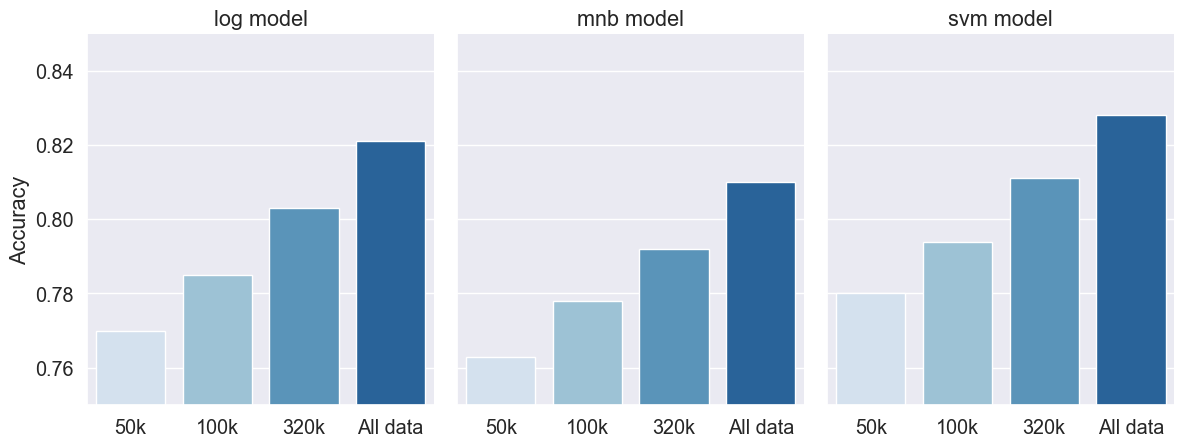

In [45]:
plt.figure(figsize=(5, 5))
g = sns.catplot(x='size',
                y='accuracy',
                col='model',
                data=results_,
                kind='bar',
                palette="Blues",
                height=5,
                aspect=.8)
g.set_axis_labels("", "Accuracy")
g.set_xticklabels(["50k", "100k", "320k", 'All data'])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0.75, 0.85));